In [7]:

import xarray as xr
import matplotlib.pyplot as plt
import time
import numpy as np
import xarray as xr
import time
import numpy as np
import cartopy.crs as ccrs
import cartopy as cart
# import xclim as xc
import os
from memory_profiler import profile

from matplotlib.colors import BoundaryNorm
import matplotlib.ticker as mticker
import matplotlib.colors as mplcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean as cmo

import matplotlib.gridspec as gridspec
# own functions
import Plot.plotfunctions as plotfunc
import Calculation.humiditycalculation as humidcalc
import Calculation.trend_func as trends
import Calculation.save_detrend_deseason as sdd
import Calculation.heat_wave_indetification as hwi
import Calculation.mask_creation as mc
homefolder = '/home/nniebaum/data_nils'
datafolder = '/data/user/nniebaum'
plotfolder = '/home/nniebaum/bachlor-thesis-code/Plots/'
areafolder = plotfolder + "Area/"

subfigure_label = ['a) ','b) ','c) ','d) ','e) ','f) ','g) ','h) ', 'i)', 'j)']
idx_subfigure_label = 0

plt.rcParams.update(plotfunc.rcParams_area)
projection = ccrs.EckertV(central_longitude=12.5)
subfigure_label = ['a) ','b) ','c) ','d) ','e) ','f) ','g) ','h) ', 'i)', 'j)']
idx_subfigure_label = 0

**Open daily max dataset**

In [13]:
data= xr.open_dataset(datafolder + '/New2_europe_full_daymax_masks_population_1900-01-01_2010-12-31.nc')


duration = data.heatwave_mask_ydrunpctl_98_referenceperiod.attrs['duration']
threshold = data.heatwave_mask_ydrunpctl_98_referenceperiod.attrs['threshold']
quantile = data.heatwave_mask_ydrunpctl_98_referenceperiod.attrs['quantile']

MovieWriter ffmpeg unavailable; using Pillow instead.


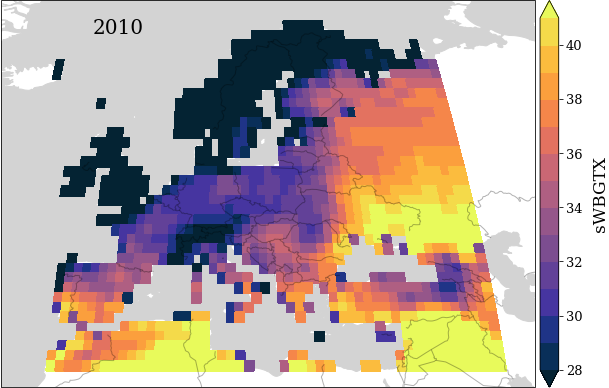

In [5]:
import matplotlib.animation as animation



fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection=projection)
ax.set_extent([-17,51,29,73])
year = 2003


plot_data = data.heatwave_mask_ydrunpctl_98_referenceperiod.groupby('time.year').sum("time")
# plot_data = data.t2m.where(data.mask_land).groupby('time.year').max("time")
# plot_data = plot_data.where(data.mask_land).where(plot_data >= duration)

longitude = plot_data.longitude
latitude = plot_data.latitude
plot_data = plot_data

# mapple = plotfunc.area_plot(ax = ax, data = plot_data[0], levels = np.arange(0,60,3),
#     cmap = 'cmo.matter', colorbar_kwargs = dict(label = 'check', extend = 'both'))

mapple, ct = plotfunc.area_plot(data= plot_data[0], ax = ax, \
            levels = np.arange(28,42,1), \
            cmap = 'cmo.thermal',
            gridline_kwargs = dict(),
            colorbar_kwargs = dict(extend = 'max', label = 'sWBGTX'))
text = ax.text(-10,70, "", size = 20,transform = ccrs.PlateCarree())
def func(frame, data, mapple, text):
    text.set_text(data.isel(year=frame).year.values)
    data = data.isel(year=frame).values.flatten()
    mapple.set_array(np.ma.array(data, mask=np.isnan(data)))

    return (mapple, text)

ani = animation.FuncAnimation(fig, 
                              func, 
                              frames=np.arange(0,111,1),
                              fargs = (plot_data, mapple, text),
                              interval=2, 
                              blit=True)

dpi = 60
ani.save('test.gif',dpi=dpi)

/home/nniebaum/miniconda3/envs/py3_std/lib/python3.7/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
MovieWriter ffmpeg unavailable; using Pillow instead.
/home/nniebaum/miniconda3/envs/py3_std/lib/python3.7/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


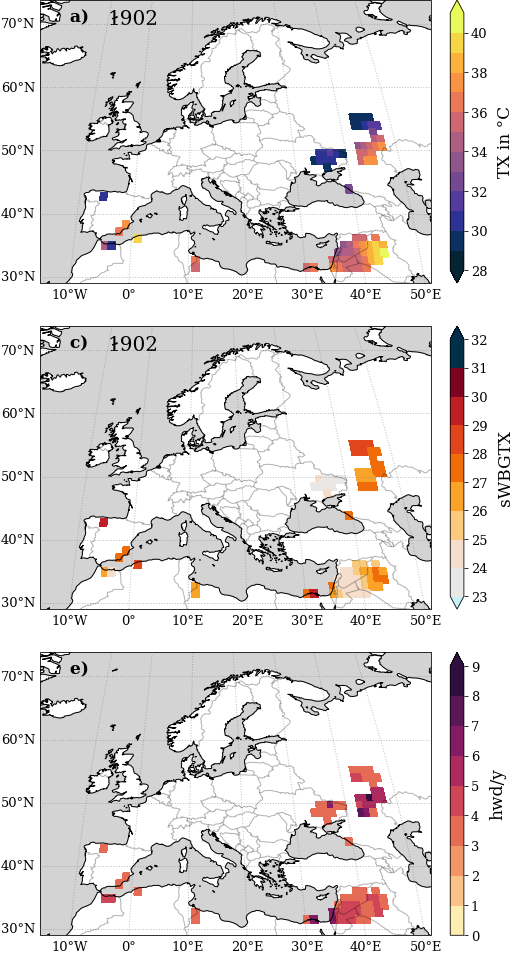

In [43]:
import matplotlib.animation as animation

figure_title = "Heat wave definition: \n {:.0f} days duration, {:.0f}°C daily max. temperature threshold, {:.0f}th percentile of temperature".format(duration, threshold, quantile*100)
fig = plt.figure(figsize = (7,18))
idx_subfigure_label = 0
gs = gridspec.GridSpec(nrows = 3, ncols = 1, wspace = 0.075, hspace = 0.0)
# gs_outer = gridspec.GridSpec(nrows = 3, ncols = 2, hspace = 0.3)




timeslice_first = slice("1900","1930")
timeslice_last = slice("1980","2010")
duration = 3
idx = 0

left_labels = True

# plot temperature
ax0 = fig.add_subplot(gs[0, idx], projection=projection)
temp = data.t2m.where(data.heatwave_mask_ydrunpctl_98_referenceperiod).groupby('time.year').mean("time")
temp = temp.where(data.mask_land)
pm0, ct0 = plotfunc.area_plot(data= temp.isel(year = 0), ax = ax0,
            levels = np.arange(28,42,1),
            cmap = 'cmo.thermal',
            colorbar_kwargs = dict(add_colorbar = False, extend = 'both'),
            gridline_kwargs = dict(left_labels = left_labels),
            axes_title = subfigure_label[idx_subfigure_label])
idx_subfigure_label += 2
text0 = ax0.text(-10,70, "", size = 20,transform = ccrs.PlateCarree())

# plot sWBGT
ax1 = fig.add_subplot(gs[1,idx], projection=projection)
swbgtx = data.swbgt.where(data.heatwave_mask_ydrunpctl_98_referenceperiod).groupby('time.year').mean("time")
swbgtx = swbgtx.where(data.mask_land)
pm1, ct1 = plotfunc.area_plot(data= swbgtx.isel(year = 0), ax = ax1,             levels = np.arange(23,33,1),             cmap = plotfunc.thermal_low_extend,
    colorbar_kwargs = dict(add_colorbar = False, extend = 'both'),
            gridline_kwargs = dict(left_labels = left_labels),
            axes_title = subfigure_label[idx_subfigure_label])
idx_subfigure_label += 2
text1 = ax1.text(-10,70, "", size = 20,transform = ccrs.PlateCarree())

# ct = swbgtx.plot.contour(ax= ax1, levels= [26.7, 29.4, 31.1, 32.2], 
#     x="longitude", y="latitude",
#     yincrease=True, transform=ccrs.PlateCarree(),
#     add_colorbar= False,
#     zorder=15, **dict(colors= ['k','k','k','w'], linestyles = [':','--','-','-'], linewidths = [1.2,1.2,1.2,1.2]))

# plot heat wave days
ax2 = fig.add_subplot(gs[2,idx], projection=projection)
heat_wave = data.heatwave_mask_ydrunpctl_98_referenceperiod.groupby('time.year').sum("time")
heat_wave = heat_wave.where(data.mask_land).where(heat_wave > 0)
pm2, ct2 = plotfunc.area_plot(data= heat_wave.isel(year = 0), ax = ax2,
    levels = np.arange(0,10,1), 
    cmap = 'cmo.matter',
    colorbar_kwargs = dict(add_colorbar = False, extend = 'max'),
            gridline_kwargs = dict(left_labels = left_labels),
            axes_title = subfigure_label[idx_subfigure_label])
idx_subfigure_label += 2
text2 = ax2.text(-10,70, "", size = 20,transform = ccrs.PlateCarree())
idx_subfigure_label -= 5



 #         dived = False
def create_cbar_axes(ax):
    pos = ax.get_position()
    return fig.add_axes([pos.x0 + pos.width *1.05, pos.y0, pos.width *0.035, pos.height], frameon = False, xticks = [], yticks = [])
ax0 = create_cbar_axes(ax0)
ax1 = create_cbar_axes(ax1)
ax2 = create_cbar_axes(ax2)
# ax1 = fig.add_subplot(gs_outer[1,-1], frameon = False, xticks = [], yticks = [])
# ax2 = fig.add_subplot(gs_outer[2,-1], frameon = False, xticks = [], yticks = [])

plotfunc.add_cbar(fig,ax0,mapple_object=pm0, percentage = "120%", divide = False, extend = 'both', orientation = 'vertical', label = 'TX in °C')
plotfunc.add_cbar(fig,ax1,mapple_object=pm1, percentage = "120%", divide = False, extend = 'both', orientation = 'vertical', label = 'sWBGTX')
plotfunc.add_cbar(fig,ax2,mapple_object=pm2, percentage = "120%", divide = False, extend = 'max', orientation = 'vertical', label = "hwd/y")



def func(frame, datas, mapple0, mapple1, mapple2, text0,text1,text2):
    
    data = datas[0]
    text0.set_text(data.isel(year=frame).year.values)
    data = data.isel(year=frame).values.flatten()
    mapple0.set_array(np.ma.array(data, mask=np.isnan(data)))

    data = datas[1]
    text1.set_text(data.isel(year=frame).year.values)
    data = data.isel(year=frame).values.flatten()
    mapple1.set_array(np.ma.array(data, mask=np.isnan(data)))

    data = datas[2]
    text2.set_text(data.isel(year=frame).year.values)
    data = data.isel(year=frame).values.flatten()
    mapple2.set_array(np.ma.array(data, mask=np.isnan(data)))

    return (pm0, pm1, pm2, text0,text1,text2)

ani = animation.FuncAnimation(fig, 
                              func, 
                              frames=np.arange(0,3,1),
                              fargs = ([temp, swbgtx, heat_wave], 
                                       pm0, pm1, pm2, 
                                       text0,text1,text2),
                              interval=2, 
                              blit=True)

dpi = 60
ani.save('test.gif',dpi=dpi)

/home/nniebaum/miniconda3/envs/py3_std/lib/python3.7/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
MovieWriter ffmpeg unavailable; using Pillow instead.
/home/nniebaum/miniconda3/envs/py3_std/lib/python3.7/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


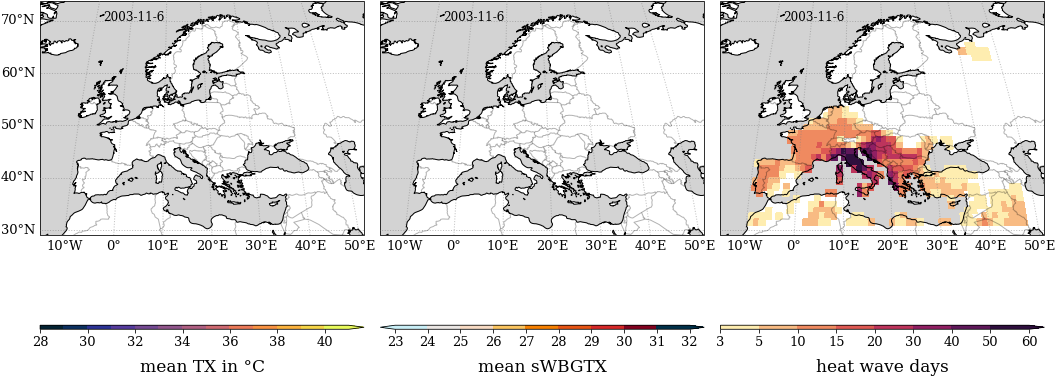

In [80]:
fig = plt.figure(figsize = (18,5))
gs = gridspec.GridSpec(1, 3, hspace = 0.01, wspace = 0.05)
hex_list = ['#caf0f8', '#eaeaea', '#f9dcc4', '#fcbf49', '#f77f00', '#d62828', '#6a040f', '#720026', '#003049']
cmap_hwmid = plotfunc.get_continuous_cmap(hex_list, float_list=[0, 0.1, 0.25,0.4, 0.5, 0.75, 0.85, 0.99, 1])
slices = [slice("1972-01","1972-12"), slice("2003-01","2003-12"), slice("2010-01","2010-12")]

timeslice = slices[1]

idx = 0
idx_subfigure_label = 0
# plot temperature
ax0 = fig.add_subplot(gs[0, 0],\
    projection=projection)
ax0.set_extent([-17,51,29,73])
temp = data.t2m.where(data.heatwave_mask_ydrunpctl_98_referenceperiod).where(data.mask_land).sel(time = timeslice)
temp = temp.where(data.mask_land)
pm0, ct0 = plotfunc.area_plot(data= temp.isel(time = 0), ax = ax0, \
            levels = np.arange(28,42,1), \
            cmap = 'cmo.thermal',
            gridline_kwargs = dict(left_labels = True),
            colorbar_kwargs = dict(extend = 'both', label = 'TX in °C'))
idx_subfigure_label += 1

# plot sWBGT
ax1 = fig.add_subplot(gs[0, 1],\
    projection=projection)
ax1.set_extent([-17,51,29,73])
swbgtx = data.swbgt.where(data.heatwave_mask_ydrunpctl_98_referenceperiod).sel(time = timeslice)
swbgtx = swbgtx.where(data.mask_land)
pm1, ct1 = plotfunc.area_plot(data= swbgtx.isel(time = 0), ax = ax1, \
            levels = np.arange(23,33,1), \
            cmap = plotfunc.thermal_low_extend,
            colorbar_kwargs = dict(extend = 'both', label = "sWBGTX"),
            gridline_kwargs = dict(left_labels = False))
idx_subfigure_label += 1

# plot heat wave days
ax2 = fig.add_subplot(gs[0, 2],\
    projection=projection)
ax2.set_extent([-17,51,29,73])
heat_wave = data.heatwave_mask_ydrunpctl_98_referenceperiod.sel(time = timeslice).sum("time").where(data.mask_land)
heat_wave = heat_wave.where(heat_wave > 0)
pm2, ct2 = plotfunc.area_plot(data= heat_wave.isel(time = 0), ax = ax2, \
    levels = [3,5,10,15,20,30,40,50,60], \
    cmap = 'cmo.matter',
    colorbar_kwargs = dict(extend = 'max', label = 'hwd/y'),
            gridline_kwargs = dict(left_labels = False))
#         ax2.set_title(subfigure_label[idx_subfigure_label], backgroundcolor= 'w', zorder = 15) # + "{} to {} heat wave days".format(timeslice.start, timeslice.stop))
idx_subfigure_label += 1
idx += 1

text0 = ax0.text(-8,70, "", size = 12,transform = ccrs.PlateCarree())
text1 = ax1.text(-8,70, "", size = 12,transform = ccrs.PlateCarree())
text2 = ax2.text(-8,70, "", size = 12,transform = ccrs.PlateCarree())
      
# def create_cbar_axes(ax):
#     pos = ax.get_position()
#     return fig.add_axes([pos.x0 , pos.y0 - pos.height *0.4, pos.width, pos.width  *0.045], frameon = False, xticks = [], yticks = [])
# ax0 = create_cbar_axes(ax0)
# ax1 = create_cbar_axes(ax1)
# ax2 = create_cbar_axes(ax2)
# ax1 = fig.add_subplot(gs_outer[1,-1], frameon = False, xticks = [], yticks = [])
# ax2 = fig.add_subplot(gs_outer[2,-1], frameon = False, xticks = [], yticks = [])

plotfunc.add_cbar(fig,ax0,mapple_object=pm0, percentage = "20%", divide = 'vertical', extend = 'max', orientation = 'horizontal', label = 'mean TX in °C')
plotfunc.add_cbar(fig,ax1,mapple_object=pm1, percentage = "20%", divide = 'vertical', extend = 'both', orientation = 'horizontal', label = 'mean sWBGTX')
plotfunc.add_cbar(fig,ax2,mapple_object=pm2, percentage = "20%", divide = 'vertical', extend = 'max', orientation = 'horizontal', label = "heat wave days")


def func(frame, datas, mapple0, mapple1, mapple2, text0,text1,text2):
    
    data = datas[0].isel(time= frame)
    text0.set_text('{:}-{:}-{:}'.format(data.time.dt.year.values, data.time.dt.month.values, data.time.dt.day.values))
    data = data.values.flatten()
    mapple0.set_array(np.ma.array(data, mask=np.isnan(data)))

    data = datas[1].isel(time= frame)
    text1.set_text('{:}-{:}-{:}'.format(data.time.dt.year.values, data.time.dt.month.values, data.time.dt.day.values))
    data = data.values.flatten()
    mapple1.set_array(np.ma.array(data, mask=np.isnan(data)))

    data = datas[2].isel(time= frame)
    text2.set_text('{:}-{:}-{:}'.format(data.time.dt.year.values, data.time.dt.month.values, data.time.dt.day.values))
    data = data.values.flatten()
    mapple2.set_array(np.ma.array(data, mask=np.isnan(data)))

    return (pm0, pm1, pm2, text0,text1,text2)

ani = animation.FuncAnimation(fig, 
                              func, 
                              frames=np.arange(31*5,31*10,1),
                              fargs = ([temp, swbgtx, heat_wave], 
                                       pm0, pm1, pm2, 
                                       text0,text1,text2),
                              interval=2, 
                              blit=True)

# dpi = 60
# ani.save('test.gif',dpi=dpi)

ValueError: dimensions {'year'} do not exist. Expected one or more of ()

/home/nniebaum/miniconda3/envs/py3_std/lib/python3.7/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


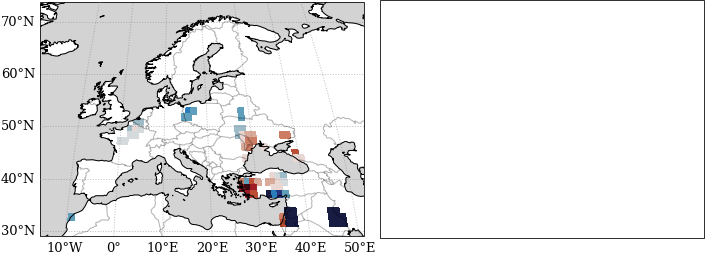

In [101]:
fig = plt.figure(figsize = (18,5))
gs = gridspec.GridSpec(1, 3, hspace = 0.01, wspace = 0.05)
hex_list = ['#caf0f8', '#eaeaea', '#f9dcc4', '#fcbf49', '#f77f00', '#d62828', '#6a040f', '#720026', '#003049']
cmap_hwmid = plotfunc.get_continuous_cmap(hex_list, float_list=[0, 0.1, 0.25,0.4, 0.5, 0.75, 0.85, 0.99, 1])


idx = 0
idx_subfigure_label = 0
# plot temperature
ax0 = fig.add_subplot(gs[0, 0],\
    projection=projection)
ax0.set_extent([-17,51,29,73])
temp = data.t2m.where(data.heatwave_mask_ydrunpctl_98_referenceperiod).where(data.mask_land).groupby('time.year').mean('time')
temp = temp.where(data.mask_land)
temp = temp - temp.mean('year')
pm0, ct0 = plotfunc.area_plot(data= temp.isel(year = 0), ax = ax0, \
            levels = np.arange(0,3.1,0.5), \
            cmap = 'cmo.balance',
            gridline_kwargs = dict(left_labels = True),
            colorbar_kwargs = dict(divergent = True, extend = 'both', add_colorbar = False))#, label = r'$\Delta$ TX in °C', orientation = 'horizontal', divide = 'vertical', percentage = "120%"))
idx_subfigure_label += 1

# plot sWBGT
ax1 = fig.add_subplot(gs[0, 1],\
    projection=projection)
ax1.set_extent([-17,51,29,73])
swbgtx = data.swbgt.where(data.heatwave_mask_ydrunpctl_98_referenceperiod).where(data.mask_land).groupby('time.year').mean('time')
swbgtx = swbgtx.where(data.mask_land)
swbgtx = swbgtx - swbgtx.mean('year')
swbgtx = swbgtx.mean()
pm1, ct1 = plotfunc.area_plot(data= swbgtx.isel(year = 0), ax = ax1, \
            levels = np.arange(0,3.1,0.5), \
            cmap = 'cmo.balance',
            colorbar_kwargs = dict(divergent = True, extend = 'both', add_colorbar = False),#, label = r'$\Delta$ sWBGTX', orientation = 'horizontal', divide = 'vertical', percentage = "120%"),
            gridline_kwargs = dict(left_labels = False))
idx_subfigure_label += 1

# plot heat wave days
ax2 = fig.add_subplot(gs[0, 2],\
    projection=projection)
ax2.set_extent([-17,51,29,73])
heat_wave = data.heatwave_mask_ydrunpctl_98_referenceperiod.where(data.mask_land).groupby('time.year').sum('time', min_count = 1)
pm2, ct2 = plotfunc.area_plot(data= heat_wave.isel(year = 0) * np.nan, ax = ax2, \
    levels = np.arange(0,60,5), \
    cmap = 'cmo.balance',
    colorbar_kwargs = dict(divergent = False, extend = 'max', add_colorbar = False), # label = r'$\Delta$ hwd/y', orientation = 'horizontal', divide = 'vertical', percentage = "120%"),
            gridline_kwargs = dict(left_labels = False))
#         ax2.set_title(subfigure_label[idx_subfigure_label], backgroundcolor= 'w', zorder = 15) # + "{} to {} heat wave days".format(timeslice.start, timeslice.stop))
idx_subfigure_label += 1
idx += 1

text0 = ax0.text(-8,70, "", size = 12,transform = ccrs.PlateCarree())
text1 = ax1.text(-8,70, "", size = 12,transform = ccrs.PlateCarree())
text2 = ax2.text(-8,70, "", size = 12,transform = ccrs.PlateCarree())
      
# def create_cbar_axes(ax):
#     pos = ax.get_position()
#     return fig.add_axes([pos.x0 , pos.y0 - pos.height *0.4, pos.width, pos.width  *0.045], frameon = False, xticks = [], yticks = [])
# ax0 = create_cbar_axes(ax0)
# ax1 = create_cbar_axes(ax1)
# ax2 = create_cbar_axes(ax2)
# ax1 = fig.add_subplot(gs_outer[1,-1], frameon = False, xticks = [], yticks = [])
# ax2 = fig.add_subplot(gs_outer[2,-1], frameon = False, xticks = [], yticks = [])

# plotfunc.add_cbar(fig,ax0,mapple_object=pm0, percentage = "20%", divide = 'vertical', extend = 'max', orientation = 'horizontal', label = r'$\Delta$ TX in °C')
# plotfunc.add_cbar(fig,ax1,mapple_object=pm1, percentage = "20%", divide = 'vertical', extend = 'both', orientation = 'horizontal', label = r'$\Delta$ sWBGTX')
# plotfunc.add_cbar(fig,ax2,mapple_object=pm2, percentage = "20%", divide = 'vertical', extend = 'max', orientation = 'horizontal', label = r'$\Delta$ hwd/y')


def func(frame, datas, mapple0, mapple1, mapple2, text0,text1,text2):
    
    data = datas[0].isel(year= frame)
    text0.set_text('{:}'.format(data.year.values))
    data = data.values.flatten()
    mapple0.set_array(np.ma.array(data, mask=np.isnan(data)))

    data = datas[1].isel(year= frame)
    text1.set_text('{:}'.format(data.year.values))
    data = data.values.flatten()
    mapple1.set_array(np.ma.array(data, mask=np.isnan(data)))

    data = datas[2].isel(year= frame)
    text2.set_text('{:}'.format(data.year.values))
    data = data.values.flatten()
    mapple2.set_array(np.ma.array(data, mask=np.isnan(data)))

    return (pm0, pm1, pm2, text0,text1,text2)

ani = animation.FuncAnimation(fig, 
                              func, 
                              frames=np.arange(0,110,1),
                              fargs = ([temp, swbgtx, heat_wave], 
                                       pm0, pm1, pm2, 
                                       text0,text1,text2),
                              interval=3, 
                              blit=True)

print('start animation')
dpi = 60
# ani.save('yearly.gif',dpi=dpi)

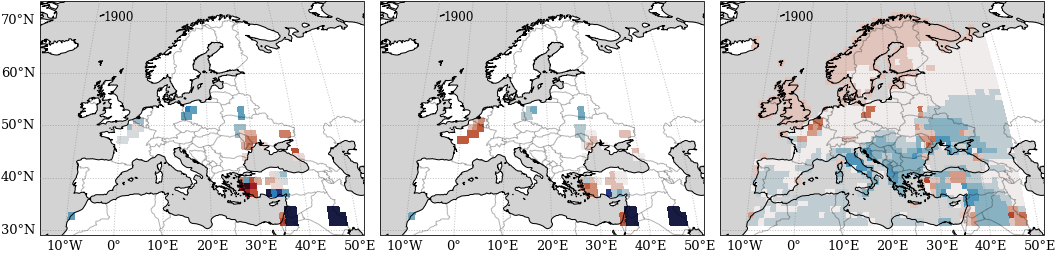

In [98]:
fig